In [2]:
"""
    a test script for box-shape reconstruction
"""

import os
import sys
import shutil
import numpy as np
import torch
import utils
import vis_utils_layout as vis_utils
from data_layout import LayoutDataset, Tree
import model_layout as model
from random import shuffle

sys.setrecursionlimit(5000) # this code uses recursion a lot for code simplicity

# how many shapes to evaluate (the top-K in test.txt)
num_recon = 10

path = '/home/weiran/Project/RvNN-Layout/Layout-TVCG23/publay_0308_last/publay_4K_0308/ckpts'
data_path = '/home/weiran/Project/RvNN-Layout/Layout-TVCG23/data/'
checkpoint = ''
out_dir = '/home/weiran/Project/RvNN-Layout/Layout-TVCG23/publay_0308_last/publay_4K_0308/reconstructed_shapes_test'

# load train config
conf = torch.load(path + '/conf.pth')

# load object category information
Tree.load_category_info(conf.category)
conf.device = 'cuda:1'

# set up device
device = torch.device(conf.device)
print(f'Using device: {conf.device}')

# check if eval results already exist. If so, delete it. 

# if os.path.exists(out_dir):
    # response = input('result directory %s exists, overwrite? (y/n) ' % out_dir)
    # if response != 'y':
    #     sys.exit()
    # shutil.rmtree(out_dir)

# create a new directory to store eval results
# os.mkdir(out_dir)

# create models
# we disable probabilistic because we do not need to jitter the decoded z during inference
encoder = model.RecursiveEncoder(conf, variational=True, probabilistic=False)
decoder = model.RecursiveDecoder(conf)

# load the pretrained models
print('Loading ckpt pretrained_encoder.pth')
data_to_restore = torch.load(path + '/' + checkpoint + 'net_encoder.pth')
encoder.load_state_dict(data_to_restore, strict=True)
print('DONE\n')
print('Loading ckpt pretrained_decoder.pth')
data_to_restore = torch.load(path + '/' + checkpoint + 'net_decoder.pth')
decoder.load_state_dict(data_to_restore, strict=True)
print('DONE\n')

# send to device
encoder.to(device)
decoder.to(device)

# set models to evaluation mode
encoder.eval()
decoder.eval()

# read test.txt
# with open(data_path + 'test.txt', 'r') as fin:
#     data_list = [l.rstrip() for l in fin.readlines()]

# shuffle(data_list)

# num_recon = 100

# reconstruct shapes
# with torch.no_grad():
#     # for i in range(num_recon):
#     for i in range(num_recon):
#         print(f'Reconstructing {i}/{num_recon} ...')

#         # load the gt data as the input
#         obj = LayoutDataset.load_object(data_path+data_list[i]+'.json')
#         obj.get_arrbox()
#         obj.to(device)

#         # feed through the encoder to get a code z
#         # root_code = encoder.encode_structure(obj)
#         root_code_and_kld = encoder.encode_structure(obj)
#         root_code = root_code_and_kld[:, :conf.feature_size]

#         # infer through the decoder to get the reconstructed output
#         # set maximal tree depth to conf.max_tree_depth
#         obj_arr = decoder.decode_structure(z=root_code, max_depth=conf.max_tree_depth)
#         obj_arr.get_arrbox()

#         # output the hierarchy
#         with open(os.path.join(out_dir, data_list[i] + '_GT.txt'), 'w') as fout:
#             fout.write(str(obj))
        
#         with open(os.path.join(out_dir, data_list[i] + '_PRED.txt'), 'w') as fout:
#             fout.write(str(obj_arr))

#         # output the assembled box-shape
#         vis_utils.draw_partnet_objects([obj, obj_arr], \
#             object_names=['GT', 'PRED'], leafs_only=True, \
#             sem_colors_filename='./part_colors_magazine.txt', figsize=(10, 6), \
#             out_fn=os.path.join(out_dir, data_list[i] + '.jpg'))
#         # vis_utils.draw_partnet_objects([obj_pred], object_names=['PRED'], figsize=(3, 5),\
#         #         leafs_only=True, sem_colors_filename='./part_colors_magazine.txt')

Using device: cuda:1
Loading ckpt pretrained_encoder.pth
DONE

Loading ckpt pretrained_decoder.pth
DONE



RecursiveDecoder(
  (box_decoder): BoxDecoder(
    (xy): Linear(in_features=256, out_features=2, bias=True)
    (size): Linear(in_features=256, out_features=2, bias=True)
  )
  (sem_decoder): SemDecoder(
    (decoder): Linear(in_features=256, out_features=10, bias=True)
  )
  (leaf_decoder): LeafDecoder(
    (decoder): Linear(in_features=256, out_features=256, bias=True)
  )
  (vertical_decoder): BranchDecoder(
    (mlp_parent_1): Linear(in_features=256, out_features=1280, bias=True)
    (mlp_parent_2): Linear(in_features=1280, out_features=1280, bias=True)
    (mlp_exists): Linear(in_features=256, out_features=1, bias=True)
    (mlp_arrange): Linear(in_features=256, out_features=20, bias=True)
    (mlp_sem): Linear(in_features=256, out_features=10, bias=True)
    (mlp_child): Linear(in_features=256, out_features=256, bias=True)
  )
  (horizontal_decoder): BranchDecoder(
    (mlp_parent_1): Linear(in_features=256, out_features=1280, bias=True)
    (mlp_parent_2): Linear(in_features=128

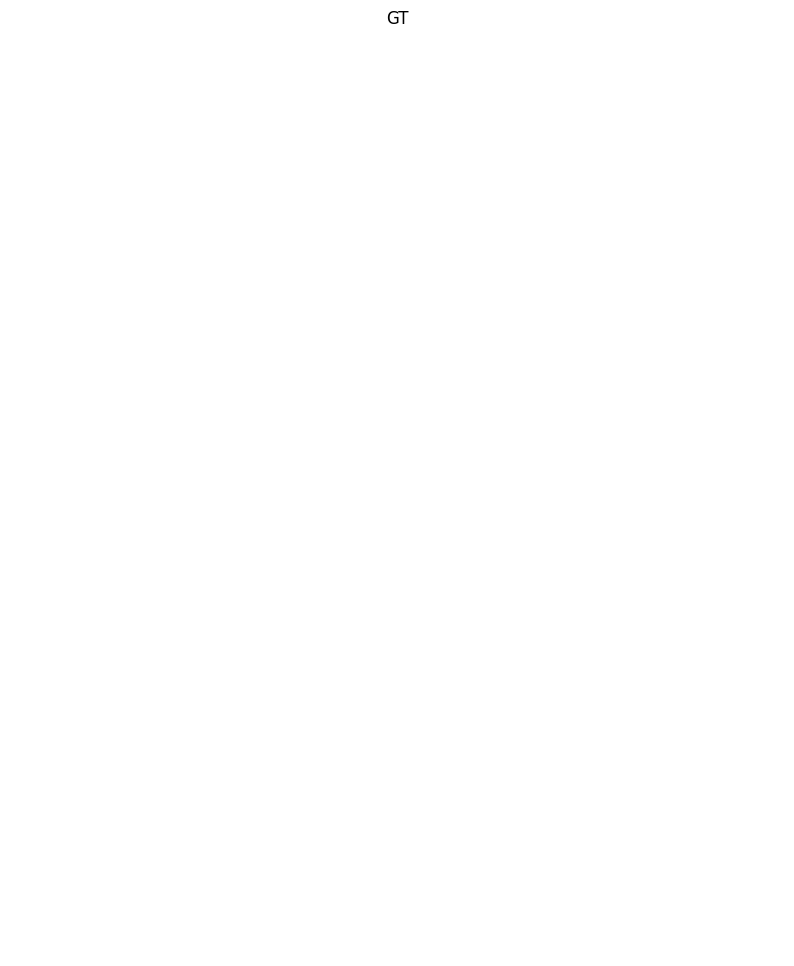

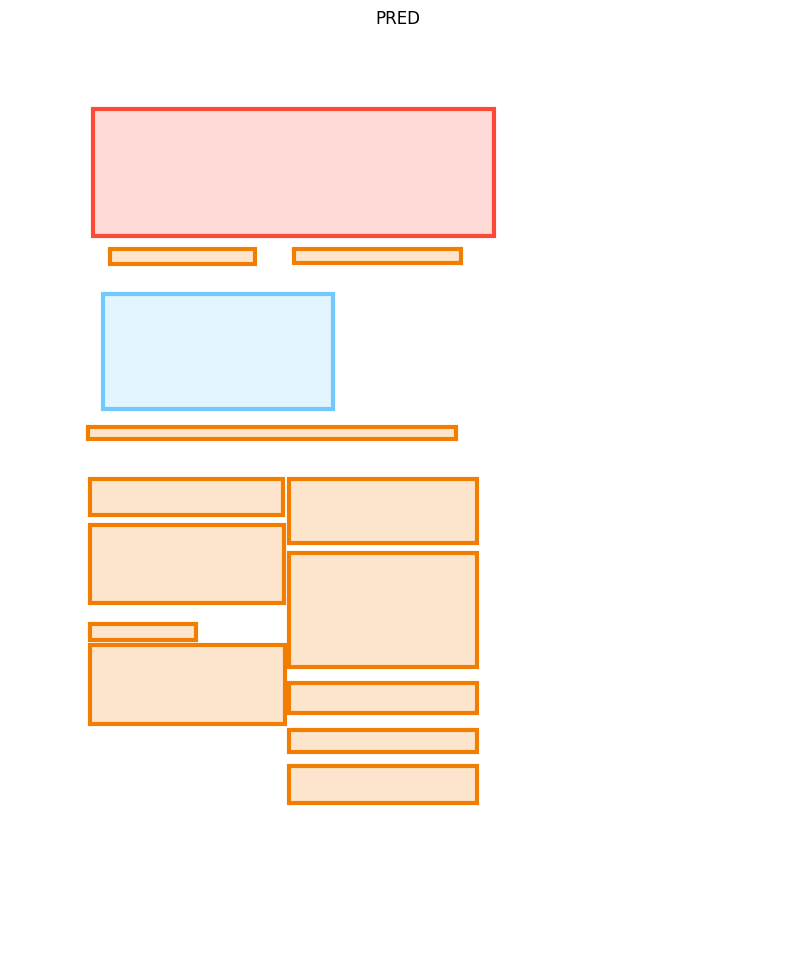

In [10]:
# load the gt data as the input
obj = LayoutDataset.load_object(data_path+ 'test' +'.json')
obj.get_arrbox()
obj.to(device)

# feed through the encoder to get a code z
# root_code = encoder.encode_structure(obj)
root_code_and_kld = encoder.encode_structure(obj)
root_code = root_code_and_kld[:, :conf.feature_size]

# infer through the decoder to get the reconstructed output
# set maximal tree depth to conf.max_tree_depth
obj_arr = decoder.decode_structure(z=root_code, max_depth=conf.max_tree_depth)
obj_arr.get_arrbox()

# output the hierarchy
# with open(os.path.join(out_dir, data_list[i] + '_GT.txt'), 'w') as fout:
#     fout.write(str(obj))

# with open(os.path.join(out_dir, data_list[i] + '_PRED.txt'), 'w') as fout:
#     fout.write(str(obj_arr))

# output the assembled box-shape
vis_utils.draw_partnet_objects([obj], \
    object_names=['GT'], leafs_only=True, \
    sem_colors_filename='./part_colors_magazine.txt', figsize=(10, 12))
# vis_utils.draw_partnet_objects([obj_pred], object_names=['PRED'], figsize=(3, 5),\
#         leafs_only=True, sem_colors_filename='./part_colors_rico.txt')
vis_utils.draw_partnet_objects([obj_arr], \
    object_names=['PRED'], leafs_only=True, \
    sem_colors_filename='./part_colors_magazine.txt', figsize=(10, 12))
# vis_utils.draw_partnet_objects([obj_arr], \
#     object_names=['PRED'], leafs_only=True, \
#     sem_colors_filename='./part_colors_magazine.txt', figsize=(10, 12), out_fn='/home/weiran/Code/RvNN-Layout/Layout-CVPR22/eval_output/compare/3_857_layout_ours.svg')
# vis_utils.draw_partnet_objects([obj_pred], object_names=['PRED'], figsize=(3, 5),\
#         leafs_only=True, sem_colors_filename='./part_colors_rico.txt')